# Quantized VGGNet-16 experiment
This IPython Notebook explores the quantization impact on VGGNet-16. VGGNet-16 is the runner-up in ILSVRC2014. However, it contains the largest memory among all the existing neural network architectures, due to the 3 large FCs at the bottom.
- Setup and run the floating point VGGNet-16

In [1]:
# global setup 
from sim_vggnet import sim_floating_point_vggnet_16
from sim_vggnet import sim_fixed_point_vggnet_16
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline
import scipy.io as io
result_dir = './vggnet_16_experiment_results/'
import collections
import cPickle as pickle

# run 1000 images from validation dataset
iterations = 100
batch_size = 10
LMDB_filename = '/mnt/hgfs/ILSVRC_dataset/ilsvrc12_val_lmdb/'

# run floating point CaffeNet (ground truth)
# so that we can get the range, and ground truth accuracy
floating_point_accuracy, floating_point_blobs_range, floating_point_weights_range, \
    floating_point_biases_range, kernels_name, blobs_name = \
    sim_floating_point_vggnet_16(LMDB_filename, batch_size=batch_size, 
                                             iterations=iterations, verbose=False)

# save the experiment results 
io.savemat(result_dir+'floating_point_acc.mat', dict(acc=floating_point_accuracy)) 

print 'Ground Truth (floating point): Top1 Acc: %f; Top5 Acc: %f' % (floating_point_accuracy[0].mean(), 
                                                                    floating_point_accuracy[1].mean())

Floating point VGGNet-16 starts inference...
Batch 0/100: Top-1 Acc: 70.00%, Top-5 Acc: 100.00%
Batch 10/100: Top-1 Acc: 70.00%, Top-5 Acc: 90.00%
Batch 20/100: Top-1 Acc: 60.00%, Top-5 Acc: 70.00%
Batch 30/100: Top-1 Acc: 50.00%, Top-5 Acc: 90.00%
Batch 40/100: Top-1 Acc: 80.00%, Top-5 Acc: 90.00%
Batch 50/100: Top-1 Acc: 40.00%, Top-5 Acc: 80.00%
Batch 60/100: Top-1 Acc: 70.00%, Top-5 Acc: 90.00%
Batch 70/100: Top-1 Acc: 90.00%, Top-5 Acc: 100.00%
Batch 80/100: Top-1 Acc: 70.00%, Top-5 Acc: 90.00%
Batch 90/100: Top-1 Acc: 70.00%, Top-5 Acc: 90.00%
Ground Truth (floating point): Top1 Acc: 0.692000; Top5 Acc: 0.880000


## 1. Uniform quantization scheme
In this exploration, weights, biases, blobs share the same quantization scheme. We will adopt 2 different quantization schemes: aggressive and conservative respectively.

In [2]:
uniform_bit_width = range(5, 17) # 5 - 16

# conservative floor strategy
round_method = 'FLOOR' # round method 
round_strategy = 'CONSERVATIVE' # round strategy
conservative_floor_uniform_accuracy = collections.OrderedDict()
for b in uniform_bit_width:
    print 'Simulate conservative + floor uniform bit %d...' % (b,)
    bit_width=dict(blobs=b, weights=b, biases=b) # uniform bit width
    conservative_floor_uniform_accuracy[b] = sim_fixed_point_vggnet_16(LMDB_filename, bit_width=bit_width, \
                                        blobs_range=floating_point_blobs_range, \
                                         weights_range=floating_point_weights_range, \
                                          biases_range=floating_point_biases_range, batch_size=batch_size, \
                                          iterations=iterations, round_method=round_method, \
                                            round_strategy=round_strategy, verbose=False)
# save the experiment results 
io.savemat(result_dir+'conservative_floor_uniform_acc.mat', dict(bit_width=conservative_floor_uniform_accuracy.keys(),
                                                          acc=conservative_floor_uniform_accuracy.values()))

# conservative round strategy
round_method = 'ROUND' # round method 
round_strategy = 'CONSERVATIVE' # round strategy
conservative_round_uniform_accuracy = collections.OrderedDict()
for b in uniform_bit_width:
    print 'Simulate conservative + round uniform bit %d...' % (b,)
    bit_width=dict(blobs=b, weights=b, biases=b) # uniform bit width
    conservative_round_uniform_accuracy[b] = sim_fixed_point_vggnet_16(LMDB_filename, bit_width=bit_width, \
                                        blobs_range=floating_point_blobs_range, \
                                         weights_range=floating_point_weights_range, \
                                          biases_range=floating_point_biases_range, batch_size=batch_size, \
                                          iterations=iterations, round_method=round_method, \
                                            round_strategy=round_strategy, verbose=False)
# save the experiment results 
io.savemat(result_dir+'conservative_round_uniform_acc.mat', dict(bit_width=conservative_round_uniform_accuracy.keys(),
                                                          acc=conservative_round_uniform_accuracy.values()))


# aggressive floor strategy
round_method = 'floor' # round method 
round_strategy = 'AGGRESSIVE' # round strategy
aggressive_floor_uniform_accuracy = collections.OrderedDict()
for b in uniform_bit_width:
    print 'Simulate aggressive + floor uniform bit %d...' % (b,)
    bit_width=dict(blobs=b, weights=b, biases=b) # uniform bit width
    aggressive_floor_uniform_accuracy[b] = sim_fixed_point_vggnet_16(LMDB_filename, bit_width=bit_width, \
                                        blobs_range=floating_point_blobs_range, \
                                         weights_range=floating_point_weights_range, \
                                          biases_range=floating_point_biases_range, batch_size=batch_size, \
                                          iterations=iterations, round_method=round_method, \
                                            round_strategy=round_strategy, verbose=False)
      
# save the experiment results 
io.savemat(result_dir+'aggressive_floor_uniform_acc.mat', dict(bit_width=aggressive_floor_uniform_accuracy.keys(),
                                                          acc=aggressive_floor_uniform_accuracy.values()))

# aggressive round strategy
round_method = 'ROUND' # round method 
round_strategy = 'AGGRESSIVE' # round strategy
aggressive_round_uniform_accuracy = collections.OrderedDict()
for b in uniform_bit_width:
    print 'Simulate aggressive + round uniform bit %d...' % (b,)
    bit_width=dict(blobs=b, weights=b, biases=b) # uniform bit width
    aggressive_round_uniform_accuracy[b] = sim_fixed_point_vggnet_16(LMDB_filename, bit_width=bit_width, \
                                        blobs_range=floating_point_blobs_range, \
                                         weights_range=floating_point_weights_range, \
                                          biases_range=floating_point_biases_range, batch_size=batch_size, \
                                          iterations=iterations, round_method=round_method, \
                                            round_strategy=round_strategy, verbose=False)
      
# save the experiment results 
io.savemat(result_dir+'aggressive_round_uniform_acc.mat', dict(bit_width=aggressive_round_uniform_accuracy.keys(),
                                                          acc=aggressive_round_uniform_accuracy.values()))

Simulate conservative + floor uniform bit 5...
Fxied point VGGNet16 starts inference...
Batch 0/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 10/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 20/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 30/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 40/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 50/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 60/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 70/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 80/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 90/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Simulate conservative + floor uniform bit 6...
Fxied point VGGNet16 starts inference...
Batch 0/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 10/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 20/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 30/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 40/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 50/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 60/100: Top-1 Acc: 0.00%, Top-5 Acc:

- Plot the Top1 Error Rate and Top5 Error Rate

Ground Truth (floating point): Top1 Acc: 0.692000; Top5 Acc: 0.880000


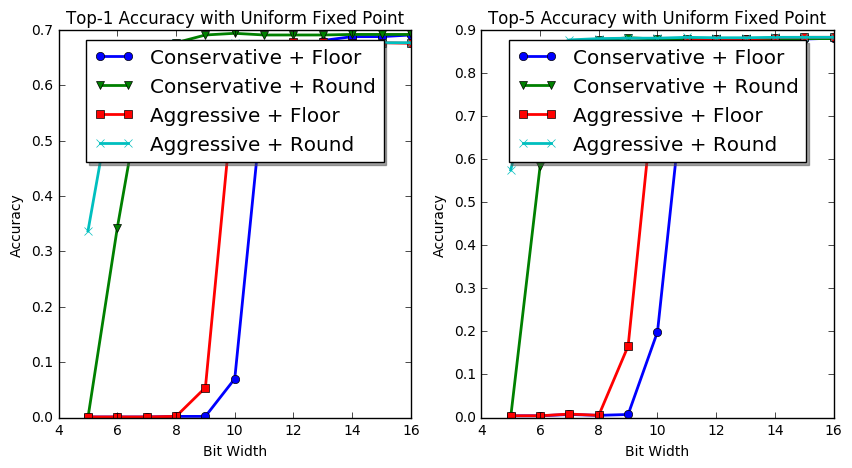

In [3]:
print 'Ground Truth (floating point): Top1 Acc: %f; Top5 Acc: %f' % (floating_point_accuracy[0].mean(), 
                                                                    floating_point_accuracy[1].mean())
plt.figure(figsize=(10, 5))
## Top1
plt.subplot(1, 2, 1)
plt.plot(uniform_bit_width, [conservative_floor_uniform_accuracy[b][0].mean() for b in uniform_bit_width], 'o-',
         linewidth=2, label='Conservative + Floor')
plt.plot(uniform_bit_width, [conservative_round_uniform_accuracy[b][0].mean() for b in uniform_bit_width], 'v-',
         linewidth=2, label='Conservative + Round')
plt.plot(uniform_bit_width, [aggressive_floor_uniform_accuracy[b][0].mean() for b in uniform_bit_width], 's-',
         linewidth=2, label='Aggressive + Floor')
plt.plot(uniform_bit_width, [aggressive_round_uniform_accuracy[b][0].mean() for b in uniform_bit_width], 'x-',
        linewidth=2, label='Aggressive + Round')
plt.title('Top-1 Accuracy with Uniform Fixed Point')
plt.xlabel('Bit Width')
plt.ylabel('Accuracy')
plt.legend(loc='upper center', shadow=True, fontsize='x-large')

## Top5
plt.subplot(1, 2, 2)
plt.plot(uniform_bit_width, [conservative_floor_uniform_accuracy[b][1].mean() for b in uniform_bit_width], 'o-',
         linewidth=2, label='Conservative + Floor')
plt.plot(uniform_bit_width, [conservative_round_uniform_accuracy[b][1].mean() for b in uniform_bit_width], 'v-',
         linewidth=2, label='Conservative + Round')
plt.plot(uniform_bit_width, [aggressive_floor_uniform_accuracy[b][1].mean() for b in uniform_bit_width], 's-',
         linewidth=2, label='Aggressive + Floor')
plt.plot(uniform_bit_width, [aggressive_round_uniform_accuracy[b][1].mean() for b in uniform_bit_width], 'x-',
        linewidth=2, label='Aggressive + Round')
plt.title('Top-5 Accuracy with Uniform Fixed Point')
plt.xlabel('Bit Width')
plt.ylabel('Accuracy')
plt.legend(loc='upper center', shadow=True, fontsize='x-large')

## 2. Explore the weights and biases quantization impact
The kernels (weights and biases) affect the final storage on the chip. We will set the internal quantization layer to have large bit width (e.g. 16), and varying the bit width of the internal kernels.

In [2]:
iterations = 100
batch_size = 10

blobs_bit_width = 16
kernels_bit_width = range(4, 17) # 4 ~ 16

# conservative floor strategy
round_method = 'FLOOR' # round method 
round_strategy = 'CONSERVATIVE' # round strategy
conservative_floor_kernels_accuracy = collections.OrderedDict()
for b in kernels_bit_width:
    print 'Simulate conservative floor kernels bit %d with blob bit %d...' % (b, blobs_bit_width)
    bit_width=dict(blobs=blobs_bit_width, weights=b, biases=b) # kernel bit width
    conservative_floor_kernels_accuracy[b] = sim_fixed_point_vggnet_16(LMDB_filename, bit_width=bit_width, \
                                        blobs_range=floating_point_blobs_range, \
                                         weights_range=floating_point_weights_range, \
                                          biases_range=floating_point_biases_range, batch_size=batch_size, \
                                          iterations=iterations, round_method=round_method, \
                                            round_strategy=round_strategy, verbose=False)
# save the experiment results 
io.savemat(result_dir+'conservative_floor_kernels_acc.mat', dict(bit_width=conservative_floor_kernels_accuracy.keys(),
                                                          acc=conservative_floor_kernels_accuracy.values()))

# conservative round strategy
round_method = 'ROUND' # round method 
round_strategy = 'CONSERVATIVE' # round strategy
conservative_round_kernels_accuracy = collections.OrderedDict()
for b in kernels_bit_width:
    print 'Simulate conservative round kernels bit %d with blob bit %d...' % (b, blobs_bit_width)
    bit_width=dict(blobs=blobs_bit_width, weights=b, biases=b) # kernel bit width
    conservative_round_kernels_accuracy[b] = sim_fixed_point_vggnet_16(LMDB_filename, bit_width=bit_width, \
                                        blobs_range=floating_point_blobs_range, \
                                         weights_range=floating_point_weights_range, \
                                          biases_range=floating_point_biases_range, batch_size=batch_size, \
                                          iterations=iterations, round_method=round_method, \
                                            round_strategy=round_strategy, verbose=False)
# save the experiment results 
io.savemat(result_dir+'conservative_round_kernels_acc.mat', dict(bit_width=conservative_round_kernels_accuracy.keys(),
                                                          acc=conservative_round_kernels_accuracy.values()))
   
# aggressive floor strategy
round_method = 'FLOOR' # round method 
round_strategy = 'AGGRESSIVE' # round strategy
aggressive_floor_kernels_accuracy = collections.OrderedDict()
for b in kernels_bit_width:
    print 'Simulate aggressive floor kernels bit %d with blob bit %d...' % (b, blobs_bit_width)
    bit_width=dict(blobs=blobs_bit_width, weights=b, biases=b) # kernel bit width
    aggressive_floor_kernels_accuracy[b] = sim_fixed_point_vggnet_16(LMDB_filename, bit_width=bit_width, \
                                        blobs_range=floating_point_blobs_range, \
                                         weights_range=floating_point_weights_range, \
                                          biases_range=floating_point_biases_range, batch_size=batch_size, \
                                          iterations=iterations, round_method=round_method, \
                                            round_strategy=round_strategy, verbose=False)    
    
# save the experiment results 
io.savemat(result_dir+'aggressive_floor_kernels_acc.mat', dict(bit_width=aggressive_floor_kernels_accuracy.keys(),
                                                          acc=aggressive_floor_kernels_accuracy.values()))    
    
# aggressive round strategy
round_method = 'ROUND' # round method 
round_strategy = 'AGGRESSIVE' # round strategy
aggressive_round_kernels_accuracy = collections.OrderedDict()
for b in kernels_bit_width:
    print 'Simulate aggressive round kernels bit %d with blob bit %d...' % (b, blobs_bit_width)
    bit_width=dict(blobs=blobs_bit_width, weights=b, biases=b) # kernel bit width
    aggressive_round_kernels_accuracy[b] = sim_fixed_point_vggnet_16(LMDB_filename, bit_width=bit_width, \
                                        blobs_range=floating_point_blobs_range, \
                                         weights_range=floating_point_weights_range, \
                                          biases_range=floating_point_biases_range, batch_size=batch_size, \
                                          iterations=iterations, round_method=round_method, \
                                            round_strategy=round_strategy, verbose=False)    
    
# save the experiment results 
io.savemat(result_dir+'aggressive_round_kernels_acc.mat', dict(bit_width=aggressive_round_kernels_accuracy.keys(),
                                                          acc=aggressive_round_kernels_accuracy.values()))

Simulate conservative floor kernels bit 4 with blob bit 16...
Fxied point VGGNet16 starts inference...
Batch 0/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 10/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 20/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 30/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 40/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 50/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 60/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 70/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 80/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 90/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Simulate conservative floor kernels bit 5 with blob bit 16...
Fxied point VGGNet16 starts inference...
Batch 0/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 10/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 20/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 30/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 40/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 50/100: Top-1 Acc: 0.00%, Top-5 Acc: 0.00%
Batch 60/100

Ground Truth (floating point): Top1 Acc: 0.692000; Top5 Acc: 0.880000


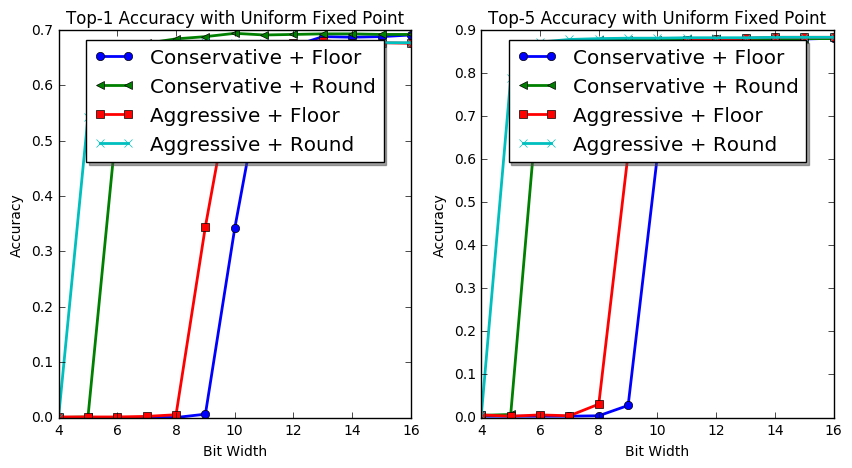

In [3]:
print 'Ground Truth (floating point): Top1 Acc: %f; Top5 Acc: %f' % (floating_point_accuracy[0].mean(), 
                                                                    floating_point_accuracy[1].mean())
plt.figure(figsize=(10, 5))
## Top1
plt.subplot(1, 2, 1)
plt.plot(kernels_bit_width, [conservative_floor_kernels_accuracy[b][0].mean() for b in kernels_bit_width], 'o-',
         linewidth=2, label='Conservative + Floor')
plt.plot(kernels_bit_width, [conservative_round_kernels_accuracy[b][0].mean() for b in kernels_bit_width], '<-',
         linewidth=2, label='Conservative + Round')
plt.plot(kernels_bit_width, [aggressive_floor_kernels_accuracy[b][0].mean() for b in kernels_bit_width], 's-',
        linewidth=2, label='Aggressive + Floor')
plt.plot(kernels_bit_width, [aggressive_round_kernels_accuracy[b][0].mean() for b in kernels_bit_width], 'x-',
        linewidth=2, label='Aggressive + Round')
plt.title('Top-1 Accuracy with Uniform Fixed Point')
plt.xlabel('Bit Width')
plt.ylabel('Accuracy')
plt.legend(loc='upper center', shadow=True, fontsize='x-large')

## Top5
plt.subplot(1, 2, 2)
plt.plot(kernels_bit_width, [conservative_floor_kernels_accuracy[b][1].mean() for b in kernels_bit_width], 'o-',
         linewidth=2, label='Conservative + Floor')
plt.plot(kernels_bit_width, [conservative_round_kernels_accuracy[b][1].mean() for b in kernels_bit_width], '<-',
         linewidth=2, label='Conservative + Round')
plt.plot(kernels_bit_width, [aggressive_floor_kernels_accuracy[b][1].mean() for b in kernels_bit_width], 's-',
        linewidth=2, label='Aggressive + Floor')
plt.plot(kernels_bit_width, [aggressive_round_kernels_accuracy[b][1].mean() for b in kernels_bit_width], 'x-',
        linewidth=2, label='Aggressive + Round')
plt.title('Top-5 Accuracy with Uniform Fixed Point')
plt.xlabel('Bit Width')
plt.ylabel('Accuracy')
plt.legend(loc='upper center', shadow=True, fontsize='x-large')